In [1]:
import timm
import random
from PIL import Image
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform
import torch
import matplotlib.pyplot as plt

In [2]:
# List available pre-trained model names
model_names = timm.list_models(pretrained=True)
print(model_names)

['bat_resnext26ts.ch_in1k', 'beit_base_patch16_224.in22k_ft_in22k', 'beit_base_patch16_224.in22k_ft_in22k_in1k', 'beit_base_patch16_384.in22k_ft_in22k_in1k', 'beit_large_patch16_224.in22k_ft_in22k', 'beit_large_patch16_224.in22k_ft_in22k_in1k', 'beit_large_patch16_384.in22k_ft_in22k_in1k', 'beit_large_patch16_512.in22k_ft_in22k_in1k', 'beitv2_base_patch16_224.in1k_ft_in1k', 'beitv2_base_patch16_224.in1k_ft_in22k', 'beitv2_base_patch16_224.in1k_ft_in22k_in1k', 'beitv2_large_patch16_224.in1k_ft_in1k', 'beitv2_large_patch16_224.in1k_ft_in22k', 'beitv2_large_patch16_224.in1k_ft_in22k_in1k', 'botnet26t_256.c1_in1k', 'caformer_b36.sail_in1k', 'caformer_b36.sail_in1k_384', 'caformer_b36.sail_in22k', 'caformer_b36.sail_in22k_ft_in1k', 'caformer_b36.sail_in22k_ft_in1k_384', 'caformer_m36.sail_in1k', 'caformer_m36.sail_in1k_384', 'caformer_m36.sail_in22k', 'caformer_m36.sail_in22k_ft_in1k', 'caformer_m36.sail_in22k_ft_in1k_384', 'caformer_s18.sail_in1k', 'caformer_s18.sail_in1k_384', 'caformer_s

In [18]:
#import urllib

# Get imagenet class mappings
#url, filename = ("https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt", "imagenet_classes.txt")
#urllib.request.urlretrieve(url, filename) 

In [3]:
# Load class labels for ImageNet
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

In [4]:
# Allow the user to select a pre-trained model

model_name = random.choice(model_names)
print(model_name)

senet154.gluon_in1k


In [5]:
# Create the selected pre-trained model and set it to evaluation mode
model = timm.create_model(model_name, pretrained=True)
model.eval()

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HP\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2

In [6]:
# Resolve data configuration and create data transformation
config = resolve_data_config({}, model=model)
transform = create_transform(**config)

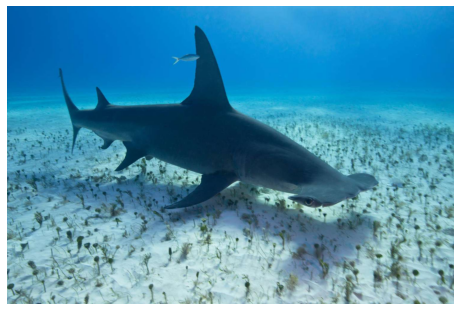

In [7]:
# Perform image classification
image_path = r"C:\Users\HP\Desktop\image classification\test images\test3.jpg"
image = Image.open(image_path).convert('RGB')

# Plot the image
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

In [8]:
# Transform the image and add a batch dimension
tensor = transform(image).unsqueeze(0) # transform and add batch dimension

In [9]:
# Perform inference using the pre-trained model
with torch.no_grad():
    out = model(tensor)
probabilities = torch.nn.functional.softmax(out[0], dim=0)

In [10]:
# Print top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)

In [11]:
# Get the class labels associated with the top 5 class indices
class_labels = [categories[i] for i in top5_catid]

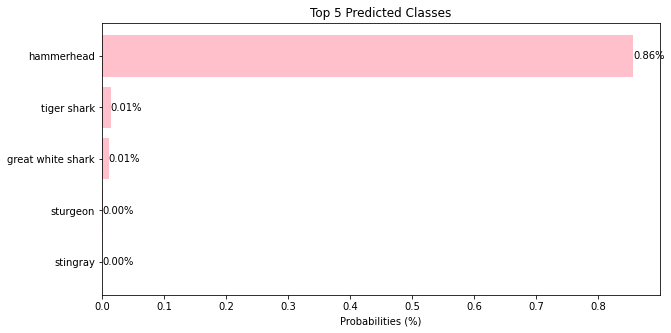

In [12]:
# Plot the top 5 class labels and their probabilities
plt.figure(figsize=(10, 5))
plt.barh(class_labels, top5_prob, color='pink')
plt.xlabel('Probabilities (%)')
plt.title('Top 5 Predicted Classes')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest probability at the top

# Display percentages on the bars
for index, value in enumerate(top5_prob):
    plt.text(value, index, f'{value:.2f}%', va='center', color='black')

plt.show()